In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as panda
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = panda.read_csv("https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment2-machineLearning/Ruter-data.csv",delimiter=";")
dataset

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


In [3]:
dataset["Dato"] = panda.to_datetime(dataset.Dato, format="%d/%m/%Y")

In [4]:
##Velger hvilken busslinje man vil predict
dataset = dataset.loc[dataset['Linjenavn'] == '100']

In [5]:
##Finner antall passasjerer ombord ved gruppere etter dag.
dataset = dataset.groupby(['Dato'], as_index=False).sum()
dataset


,Dato,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,2020-06-01,2,453,17
1,2020-06-02,2,906,38
2,2020-06-03,3,755,50
3,2020-06-04,6,1359,57
4,2020-06-05,3,604,6
...,...,...,...,...
85,2020-08-26,2,755,77
86,2020-08-27,3,1057,40
87,2020-08-28,3,1057,40
88,2020-08-29,4,755,13


In [6]:
##Dropper alle kolonner man ikke trenger
dataset = dataset.drop(['Linjeretning' , 'Kjøretøy_Kapasitet'], axis ='columns')
dataset

,Dato,Passasjerer_Ombord
0,2020-06-01,17
1,2020-06-02,38
2,2020-06-03,50
3,2020-06-04,57
4,2020-06-05,6
...,...,...
85,2020-08-26,77
86,2020-08-27,40
87,2020-08-28,40
88,2020-08-29,13


In [7]:
##Finner outliers. 
## det kan ikke være mindre enn 0 passasjerer ombord.
lower_limit, upper_limit = dataset.Passasjerer_Ombord.quantile([0.01,0.9])
lower_limit, upper_limit

(0.0, 73.40000000000003)

In [8]:
##Det kan ikke være mindre enn 0 passasjerer ombord på en buss.
dataset = dataset[(dataset.Passasjerer_Ombord>=lower_limit)&(dataset.Passasjerer_Ombord<upper_limit)]
dataset.shape

(81, 2)

In [9]:
##Gjør Dato om til en String.
dataset['Dato'] = dataset['Dato'].dt.strftime('%d%m%Y')
dataset

<ipython-input-9-a18cd9cd8647>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Dato'] = dataset['Dato'].dt.strftime('%d%m%Y')


,Dato,Passasjerer_Ombord
0,01062020,17
1,02062020,38
2,03062020,50
3,04062020,57
4,05062020,6
...,...,...
84,25082020,4
86,27082020,40
87,28082020,40
88,29082020,13


In [10]:
x = np.arange(len(dataset.Dato))
y = dataset.Passasjerer_Ombord.values
x = x.reshape(-1,1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0 )

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [12]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state= 0)
forest.fit(x.reshape(-1,1),y.reshape(-1,1))

<ipython-input-12-80e3a2e60ac7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x.reshape(-1,1),y.reshape(-1,1))


RandomForestRegressor(n_estimators=500, random_state=0)

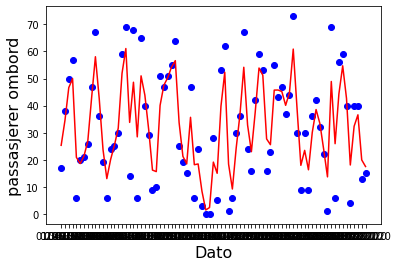

In [13]:
##Lager en plot.
plt.xlabel('Dato',fontsize=16)
plt.ylabel('passasjerer ombord',fontsize=16)
plt.scatter(dataset.Dato,dataset.Passasjerer_Ombord,color='blue')
plt.plot(x,forest.predict(x),color='red')

In [14]:
##Predict antall passasjerer ombord for dato 31-08-2020
forest.predict([[31082020]])

array([17.508])

In [15]:
##Prediction score
print("Score: ", forest.score(x, y))

Score:  0.8227149458074552
